# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
df = pd.read_csv('rollercoaster_dataset.csv')

# Summary of the Data

This dataset has real roller coasters from different theme parks around the world. It includes things like speed, height, inversions, manufacturer, opening date, and more. The data was pulled from ride databases and park records and posted on Kaggle. I picked this dataset because I worked in the theme park industry for years, and I thought it would be cool to explore what makes a roller coaster more intense or popular.

In [15]:
df.head()

,Coaster_Name,Location,Manufacturer,Type_Main,Year_Introduced,Latitude,Longitude,Speed_mph,Height_ft,Inversions,Gforce,Opening_Date
0,Switchback Railway,Coney Island,LaMarcus Adna Thompson,Wood,1884,40.5740,-73.9780,6,103,0,2.900000,1884-06-16
1,Flip Flap Railway,Sea Lion Park,Lina Beecher,Wood,1895,40.5780,-73.9790,49,103,1,12.000000,1895-01-01
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Vekoma,Other,1896,41.5800,-81.5700,49,103,0,3.815093,1999-01-01
3,Loop the Loop (Coney Island),Other,Edwin Prescott,Steel,1901,40.5745,-73.9780,49,103,1,3.815093,1901-01-01
4,Loop the Loop (Young's Pier),Other,Edwin Prescott,Steel,1901,39.3538,-74.4342,49,103,1,3.815093,1901-01-01


# Identify 5 interesting questions about your data

1. Which years had the most new roller coasters built?
2. How fast are most roller coasters compared to the average speed?
3. Do taller roller coasters tend to be faster?
4. What is the fastest roller coaster in the dataset?
5. Which manufacturer has built the most roller coasters?

# Answers

# 1. Which years had the most new roller coasters built?

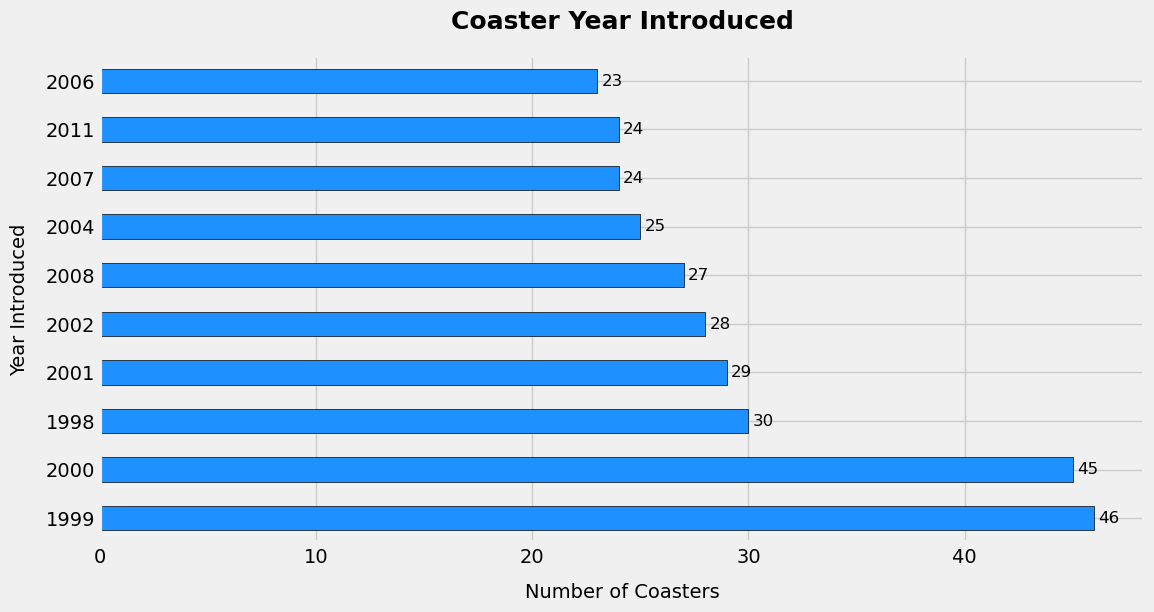

In [21]:
ax = df['Year_Introduced'].value_counts().head(10) \
    .plot(kind='barh', figsize=(12, 6), color='dodgerblue', edgecolor='black')

ax.set_title('Coaster Year Introduced', fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Number of Coasters', fontsize=14, labelpad=12)
ax.set_ylabel('Year Introduced', fontsize=14, labelpad=12)

ax.bar_label(ax.containers[0], label_type='edge', padding=3, fontsize=12)
plt.show()

From the chart, we can see that the late 90s and early 2000s had the biggest boom in new roller coasters. Years like 1999 and 2000 had the most coasters introduced, with over 40 each. After that, the numbers drop a bit, but the early 2000s still stayed pretty active. Overall, this suggests that amusement parks were expanding a lot around that time.

# 2. How fast are most roller coasters compared to the average speed?

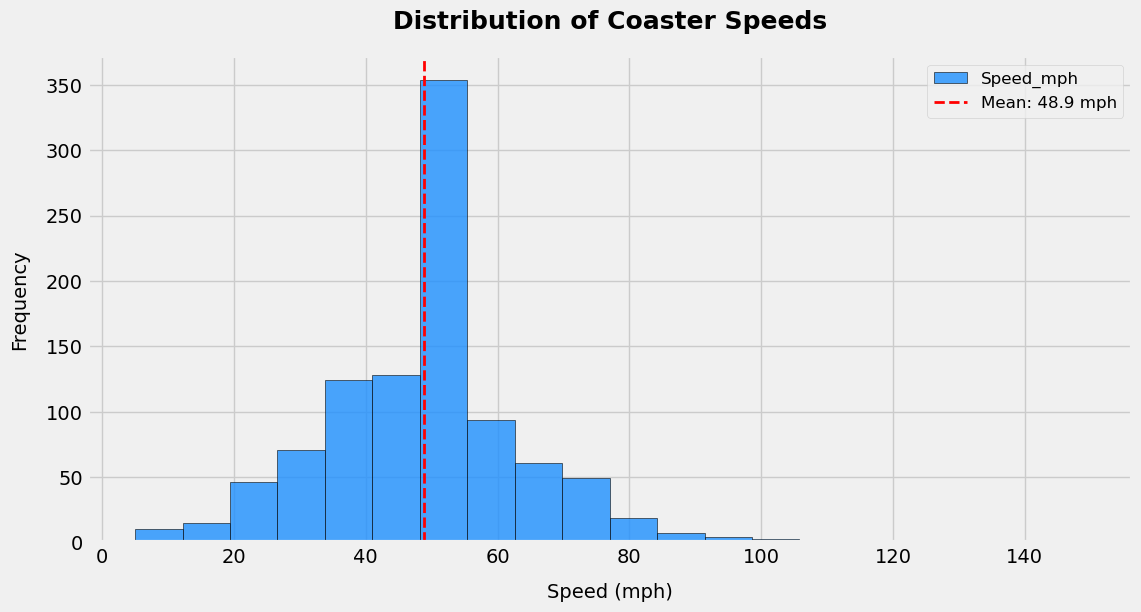

In [26]:
ax = df['Speed_mph'].plot(kind='hist', figsize=(12,6), bins=20, color='dodgerblue', edgecolor='black', alpha=0.8)

ax.set_title('Distribution of Coaster Speeds', fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Speed (mph)', fontsize=14, labelpad=12)
ax.set_ylabel('Frequency', fontsize=14, labelpad=12)

mean_speed = df['Speed_mph'].mean()
ax.axvline(mean_speed, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_speed:.1f} mph')

ax.legend(fontsize=12)

plt.show()

Most roller coasters fall pretty close to the average speed, which is around 49 mph. The histogram shows that the biggest group of coasters are in the 40–60 mph range. There are a few really slow and super fast coasters, but they’re rare. Overall, the average coaster speed lands somewhere in the middle of the distribution.

# 3. Do taller roller coasters tend to be faster?

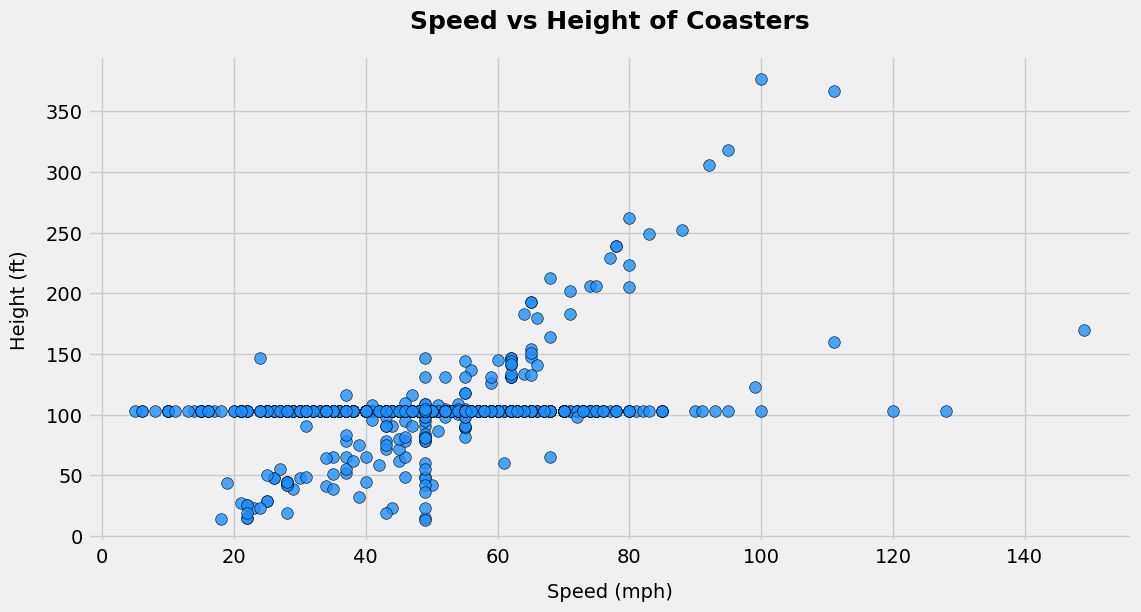

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(df['Speed_mph'], df['Height_ft'], color='dodgerblue', edgecolor='black', alpha=0.8, s=70)

ax.set_title('Speed vs Height of Coasters', fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Speed (mph)', fontsize=14, labelpad=12)
ax.set_ylabel('Height (ft)', fontsize=14, labelpad=12)

plt.show()

In [28]:
df['Height_ft'].value_counts().head(10)

Height_ft
103    831
91       7
131      7
98       7
65       5
78       5
82       4
45       4
147      4
42       4
Name: count, dtype: int64

Based on the scatter plot, it looks like taller roller coasters do tend to be faster. You can see a general trend upward, where coasters with higher heights often reach higher speeds. There’s definitely some spread, but the taller rides are mostly grouped toward the faster end of the chart.

One thing that stands out is the horizontal line of dots around 103 feet. That happens because a huge number of coasters in this dataset share that exact same height, which creates a line when plotted. Even with that clustering, the overall pattern still shows that taller coasters usually lead to higher speed due to bigger drops and more momentum.

Overall, the data suggests there’s a positive relationship between height and speed, even though there are some exceptions and noisy points.

# 4. What is the fastest roller coaster in the dataset?

In [30]:
df.loc[df['Speed_mph'] == df['Speed_mph'].max()]

,Coaster_Name,Location,Manufacturer,Type_Main,Year_Introduced,Latitude,Longitude,Speed_mph,Height_ft,Inversions,Gforce,Opening_Date
758,Formula Rossa,Ferrari World Abu Dhabi,Intamin,Steel,2010,24.4842,54.6124,149,170,0,4.8,2010-11-04


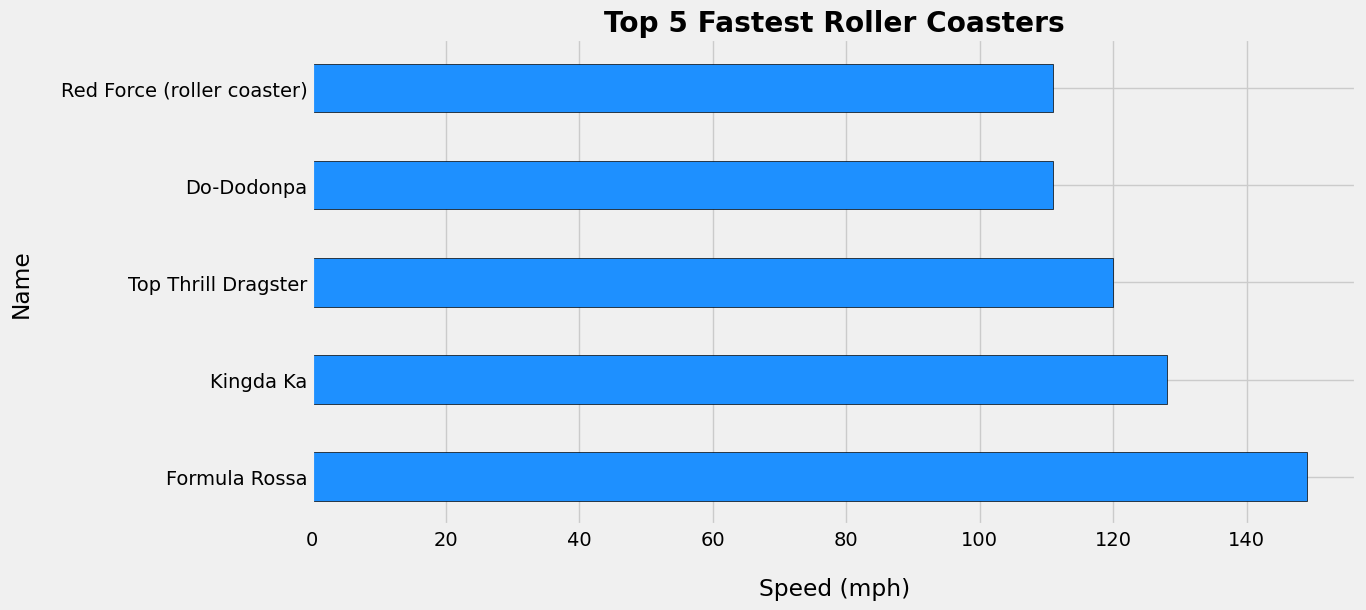

In [61]:
top5 = df[['Coaster_Name', 'Speed_mph']].sort_values(by='Speed_mph', ascending=False).head(5)

top5.plot(kind='barh', x='Coaster_Name', y='Speed_mph', figsize=(12,6), color='dodgerblue', edgecolor='black', legend=False)

plt.xlabel('Speed (mph)', labelpad=20)
plt.ylabel('Name', labelpad=20)
plt.title('Top 5 Fastest Roller Coasters', fontweight='bold')

plt.show()

The fastest roller coaster in the dataset is Formula Rossa, reaching about 149 mph. It’s at Ferrari World in Abu Dhabi. The bar chart shows the top 5 fastest coasters, and Formula Rossa is way ahead of the others by a noticeable margin.

# 5. Which manufacturer has built the most roller coasters?

In [48]:
df['Manufacturer'].value_counts().head()

Manufacturer
Vekoma                  180
Bolliger & Mabillard    104
Intamin                  84
Mack Rides               53
Arrow Dynamics           53
Name: count, dtype: int64

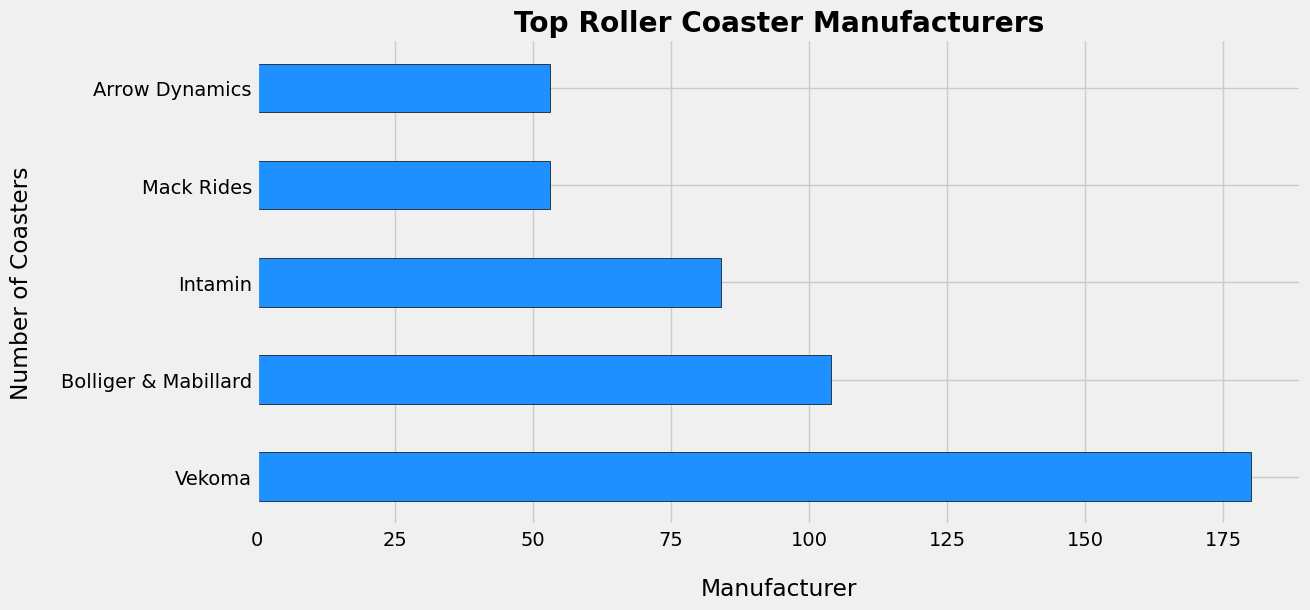

In [59]:
top_manufacturers = df['Manufacturer'].value_counts().head()

top_manufacturers.plot( kind='barh', figsize=(12,6), color='dodgerblue', edgecolor='black')

plt.title('Top Roller Coaster Manufacturers', fontweight='bold')
plt.xlabel('Manufacturer', labelpad=20)
plt.ylabel('Number of Coasters', labelpad=20)
plt.show()

After counting the manufacturers in the dataset, Vekoma has built the most roller coasters overall. Behind them are Bolliger & Mabillard and Intamin. These companies show up a lot in theme parks, so it makes sense they ended up at the top.